In [237]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [238]:
df=pd.read_csv("Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [240]:
df=df.loc[:364,:]

In [241]:
for i in range(0,365):
  df['Temperatura Maxima (C)'][i]=df['Temperatura Maxima (C)'][i].replace(',','.')
  df['Temperatura Media (C)'][i]=df['Temperatura Media (C)'][i].replace(',','.')
  df['Temperatura Minima (C)'][i]=df['Temperatura Minima (C)'][i].replace(',','.')
  df['Precipitacao (mm)'][i]=df['Precipitacao (mm)'][i].replace(',','.')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [242]:
df.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
360,2015-12-27,24,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467
364,2015-12-31,24.76,20.2,29,0,0.0,22.446


In [243]:
df['Temperatura Maxima (C)']=df['Temperatura Maxima (C)'].astype('float64')
df['Temperatura Media (C)']=df['Temperatura Media (C)'].astype('float64')
df['Temperatura Minima (C)']=df['Temperatura Minima (C)'].astype('float64')
df['Precipitacao (mm)']=df['Precipitacao (mm)'].astype('float64')

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [245]:
X=df[['Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)','Final de Semana','Precipitacao (mm)']]
y=df[['Consumo de cerveja (litros)']]

In [319]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [320]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

In [321]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [322]:
Y_test_pred=regr.predict(X_test)
Y_train_pred=regr.predict(X_train)

In [323]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(Y_test, Y_test_pred))

Mean squared error: 5.70
Coefficient of determination: 0.74


In [324]:
print('Mean squared error: %.2f'% mean_squared_error(Y_train, Y_train_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(Y_train, Y_train_pred))

Mean squared error: 5.31
Coefficient of determination: 0.71


In [330]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mean_squared_error')

In [334]:
model.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),batch_size=32,epochs=100)
model.summary()

Epoch 1/100
10/10 [==============================] - 0s 9ms/step - loss: 8.1501 - val_loss: 8.4593
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 8.1465 - val_loss: 8.3159
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 8.1434 - val_loss: 8.2524
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 8.0477 - val_loss: 8.2598
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 7.9898 - val_loss: 8.2958
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 7.9256 - val_loss: 8.1774
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 7.8943 - val_loss: 8.0654
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 7.8936 - val_loss: 8.1159
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 7.7845 - val_loss: 8.0738
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 7.7671 - val_loss: 7.9320
Epoch 11/

In [335]:
y_pred = model.predict(X_test)

In [336]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))

MAE: 1.9880567723104399
MSE: 6.014144362998799
RMSE: 2.4523752492224347
VarScore: 0.7291434219390427


In [236]:
X_test.shape

(92, 4)

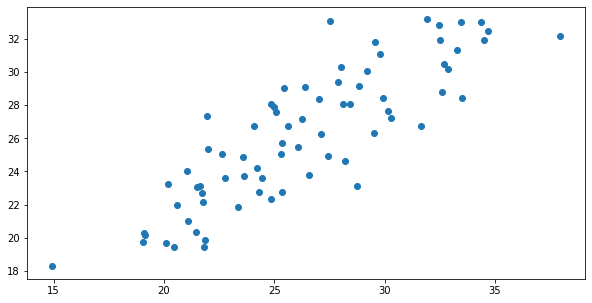

In [348]:
fig = plt.figure(figsize=(10,5))
plt.scatter(Y_test,y_pred)